In [1]:
import torch
from torch.nn import *
import torch.nn.functional as F
from pandas_datareader import data as web
import os
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from diebold_mariano import diebold_mariano_test

In [2]:
from utils import *

DEVICE:  cuda


In [3]:
T=30

In [4]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

# Set consistent style for publication-quality plots
sns.set(style="whitegrid", context="talk", palette="colorblind")
matplotlib.rcParams.update({
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
    "legend.frameon": True,
    "axes.titleweight": "bold"
})

def customize_ax(ax, title=None, xlabel=None, ylabel=None):
    if title:
        ax.set_title(title, fontsize=14, fontweight="bold")
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=12)
    if ylabel:
        ax.set_ylabel(ylabel, fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.grid(True)
    if ax.get_legend():
        ax.legend(fontsize=10, frameon=True)

# Insert your original loop code here afterward, using customize_ax() and matplotlib.rcParams updates
# on all relevant plots to ensure publication-quality formatting.


In [5]:
etfs = ['XLB','XLE','XLF','XLI','XLK','XLP','XLV','XLY','XLU']
metric2 = "SD_Squared_Returns"
metric3 = "SD_Prices"
metric4 = "IQR"
metrics = ["ATR",metric2,metric3,metric4]
# start = '2001-01-01'
# end = '2020-01-01'
# start_t = '2022-01-02'
# end_t = '2024-01-05'
date_list = [['2001-01-01', '2020-01-01', '2022-01-02', '2024-01-05'], ['1990-01-05', '2010-01-05', '2023-01-05', '2024-01-05'], ['2000-01-05', "2024-01-05", "2024-01-05", "2025-01-05"], ['2005-01-05', '2010-01-05', '2020-01-05', '2024-01-05']]
starts,ends = np.array([(f'200{i}-01-01',f'200{i+12}-01-01') for i in range(0,12,4)]).T
models = {}
lrs = [0]
h1 = 50
h2 = 50
hl1s = [20,50,70,100]
hl1s = [20,50,70,100]
models = ["LSTM","RNN"]
b_types = ['ATR' ,'STD']
lr = 0
feat_combos = [['Open','Close','High','Low','Volume','Return','Short_MA','Long_MA'],['Open','Close','High','Low','Volume'],['index','Open','Close','High','Low','Volume']]

[*********************100%***********************]  1 of 1 completed


read  4779  lines of data for ticker:  XLB
QUANTILE25:  [nan, nan, nan, nan, nan, nan, nan, -0.04818807931691447, -0.050912897502218064, -0.050912897502218064, -0.050912897502218064, -0.050912897502218064, -0.050912897502218064, -0.050912897502218064, -0.02899560041099765, -0.01085358459141081, -0.01085358459141081, -0.015912817128036216, -0.013483350337287127, 2.1318893337036494e-05, 2.1318893337036494e-05, 0.0010181816854298049, -0.0063573343543586016, -0.0063573343543586016, -0.0063573343543586016, -0.003345283884366968, -0.01192084858676322, -0.01192084858676322, -0.01192084858676322, -0.011492435997519635, -0.01983639361051508, -0.01417770020324221, -0.024748509290070123, -0.014661366554689106, -0.028439165443203445, -0.028439165443203445, -0.028439165443203445, -0.022104454871140485, -0.022104454871140485, -0.008326655982626146, -0.003979596732024993, 0.0023740735952164534, 0.0023740735952164534, 0.0023740735952164534, 0.0023740735952164534, 0.004475418076052066, -0.0013256902347

[*********************100%***********************]  1 of 1 completed


read  504  lines of data for ticker:  XLB
QUANTILE25:  [nan, nan, nan, nan, nan, nan, nan, -0.011138102432448713, -0.018028249477897797, -0.01876478854202645, -0.01876478854202645, -0.01876478854202645, -0.02178538666279488, -0.027899057896797134, -0.027899057896797134, -0.027899057896797134, -0.027899057896797134, -0.025131114081793596, -0.025131114081793596, -0.01957432656605285, -0.008484247582684285, -0.005935284141150385, -0.007351559805820656, -0.01355910464734306, -0.021647679044040937, -0.021647679044040937, -0.021647679044040937, -0.022546031917112852, -0.03229494071672012, -0.023840303616331913, -0.014091394816724641, -0.014091394816724641, -0.023840303616331913, -0.023840303616331913, -0.029884057237868432, -0.027196938261464958, -0.027196938261464958, -0.027196938261464958, -0.027196938261464958, -0.027196938261464958, -0.027196938261464958, -0.02435275164919582, -0.0149331468599586, -0.03474414609814747, -0.03474414609814747, -0.0284229835237073, -0.008611984285518424, -0.

[*********************100%***********************]  1 of 1 completed

On the 469th day, Bought 6.163708086785009 shares for $499.99999999999994
On the 482th day, sold 6.163708086785009 shares for $517.7514792899408
XLB Final Value: 1017.7514792899408, Final Money: 1017.7514792899408, Final Shares: 0.0
read  4779  lines of data for ticker:  XLB


QUANTILE25:  [nan, nan, nan, nan, nan, nan, nan, -0.04818807931691447, -0.050912897502218064, -0.050912897502218064, -0.050912897502218064, -0.050912897502218064, -0.050912897502218064, -0.050912897502218064, -0.02899560041099765, -0.01085358459141081, -0.01085358459141081, -0.015912817128036216, -0.013483350337287127, 2.1318893337036494e-05, 2.1318893337036494e-05, 0.0010181816854298049, -0.0063573343543586016, -0.0063573343543586016, -0.0063573343543586016, -0.003345283884366968, -0.01192084858676322, -0.01192084858676322, -0.01192084858676322, -0.011492435997519635, -0.01983639361051508, -0.01417770020324221, -0.024748509290070123, -0.014661366554689106, -0.028439165443203445, -0.028439165443203445, -0.028439165443203445, -0.022104454871140485, -0.022104454871140485, -0.008326655982626146, -0.003979596732024993, 0.0023740735952164534, 0.0023740735952164534, 0.0023740735952164534, 0.0023740735952164534, 0.004475418076052066, -0.0013256902347455945, -0.010673764684754065, -0.016762028

[*********************100%***********************]  1 of 1 completed


read  504  lines of data for ticker:  XLB
QUANTILE25:  [nan, nan, nan, nan, nan, nan, nan, -0.011138102432448713, -0.018028249477897797, -0.01876478854202645, -0.01876478854202645, -0.01876478854202645, -0.02178538666279488, -0.027899057896797134, -0.027899057896797134, -0.027899057896797134, -0.027899057896797134, -0.025131114081793596, -0.025131114081793596, -0.01957432656605285, -0.008484247582684285, -0.005935284141150385, -0.007351559805820656, -0.01355910464734306, -0.021647679044040937, -0.021647679044040937, -0.021647679044040937, -0.022546031917112852, -0.03229494071672012, -0.023840303616331913, -0.014091394816724641, -0.014091394816724641, -0.023840303616331913, -0.023840303616331913, -0.029884057237868432, -0.027196938261464958, -0.027196938261464958, -0.027196938261464958, -0.027196938261464958, -0.027196938261464958, -0.027196938261464958, -0.02435275164919582, -0.0149331468599586, -0.03474414609814747, -0.03474414609814747, -0.0284229835237073, -0.008611984285518424, -0.

[*********************100%***********************]  1 of 1 completed

On the 469th day, Bought 6.163708086785009 shares for $499.99999999999994
On the 470th day, Bought 0 shares for $0.0
On the 471th day, Bought 0 shares for $0.0
On the 476th day, sold 6.163708086785009 shares for $500.801282051282
XLB Final Value: 1000.801282051282, Final Money: 1000.801282051282, Final Shares: 0.0
read  4779  lines of data for ticker:  XLB


QUANTILE25:  [nan, nan, nan, nan, nan, nan, nan, -0.04818807931691447, -0.050912897502218064, -0.050912897502218064, -0.050912897502218064, -0.050912897502218064, -0.050912897502218064, -0.050912897502218064, -0.02899560041099765, -0.01085358459141081, -0.01085358459141081, -0.015912817128036216, -0.013483350337287127, 2.1318893337036494e-05, 2.1318893337036494e-05, 0.0010181816854298049, -0.0063573343543586016, -0.0063573343543586016, -0.0063573343543586016, -0.003345283884366968, -0.01192084858676322, -0.01192084858676322, -0.01192084858676322, -0.011492435997519635, -0.01983639361051508, -0.01417770020324221, -0.024748509290070123, -0.014661366554689106, -0.028439165443203445, -0.028439165443203445, -0.028439165443203445, -0.022104454871140485, -0.022104454871140485, -0.008326655982626146, -0.003979596732024993, 0.0023740735952164534, 0.0023740735952164534, 0.0023740735952164534, 0.0023740735952164534, 0.004475418076052066, -0.0013256902347455945, -0.010673764684754065, -0.016762028

[*********************100%***********************]  1 of 1 completed


read  504  lines of data for ticker:  XLB
QUANTILE25:  [nan, nan, nan, nan, nan, nan, nan, -0.011138102432448713, -0.018028249477897797, -0.01876478854202645, -0.01876478854202645, -0.01876478854202645, -0.02178538666279488, -0.027899057896797134, -0.027899057896797134, -0.027899057896797134, -0.027899057896797134, -0.025131114081793596, -0.025131114081793596, -0.01957432656605285, -0.008484247582684285, -0.005935284141150385, -0.007351559805820656, -0.01355910464734306, -0.021647679044040937, -0.021647679044040937, -0.021647679044040937, -0.022546031917112852, -0.03229494071672012, -0.023840303616331913, -0.014091394816724641, -0.014091394816724641, -0.023840303616331913, -0.023840303616331913, -0.029884057237868432, -0.027196938261464958, -0.027196938261464958, -0.027196938261464958, -0.027196938261464958, -0.027196938261464958, -0.027196938261464958, -0.02435275164919582, -0.0149331468599586, -0.03474414609814747, -0.03474414609814747, -0.0284229835237073, -0.008611984285518424, -0.

[*********************100%***********************]  1 of 1 completed

On the 470th day, Bought 6.171315724512467 shares for $500.00000000000006
On the 471th day, Bought 6.159152500615915 shares for $500.0
On the 472th day, Bought 0 shares for $0.0
On the 482th day, sold 12.330468225128381 shares for $1035.759330910784
XLB Final Value: 1084.6304520935087, Final Money: 1084.6304520935087, Final Shares: 0.0
read  4779  lines of data for ticker:  XLB


QUANTILE25:  [nan, nan, nan, nan, nan, nan, nan, -0.04818807931691447, -0.050912897502218064, -0.050912897502218064, -0.050912897502218064, -0.050912897502218064, -0.050912897502218064, -0.050912897502218064, -0.02899560041099765, -0.01085358459141081, -0.01085358459141081, -0.015912817128036216, -0.013483350337287127, 2.1318893337036494e-05, 2.1318893337036494e-05, 0.0010181816854298049, -0.0063573343543586016, -0.0063573343543586016, -0.0063573343543586016, -0.003345283884366968, -0.01192084858676322, -0.01192084858676322, -0.01192084858676322, -0.011492435997519635, -0.01983639361051508, -0.01417770020324221, -0.024748509290070123, -0.014661366554689106, -0.028439165443203445, -0.028439165443203445, -0.028439165443203445, -0.022104454871140485, -0.022104454871140485, -0.008326655982626146, -0.003979596732024993, 0.0023740735952164534, 0.0023740735952164534, 0.0023740735952164534, 0.0023740735952164534, 0.004475418076052066, -0.0013256902347455945, -0.010673764684754065, -0.016762028

[*********************100%***********************]  1 of 1 completed


read  504  lines of data for ticker:  XLB
QUANTILE25:  [nan, nan, nan, nan, nan, nan, nan, -0.011138102432448713, -0.018028249477897797, -0.01876478854202645, -0.01876478854202645, -0.01876478854202645, -0.02178538666279488, -0.027899057896797134, -0.027899057896797134, -0.027899057896797134, -0.027899057896797134, -0.025131114081793596, -0.025131114081793596, -0.01957432656605285, -0.008484247582684285, -0.005935284141150385, -0.007351559805820656, -0.01355910464734306, -0.021647679044040937, -0.021647679044040937, -0.021647679044040937, -0.022546031917112852, -0.03229494071672012, -0.023840303616331913, -0.014091394816724641, -0.014091394816724641, -0.023840303616331913, -0.023840303616331913, -0.029884057237868432, -0.027196938261464958, -0.027196938261464958, -0.027196938261464958, -0.027196938261464958, -0.027196938261464958, -0.027196938261464958, -0.02435275164919582, -0.0149331468599586, -0.03474414609814747, -0.03474414609814747, -0.0284229835237073, -0.008611984285518424, -0.

NameError: name 'model_df_iqr' is not defined

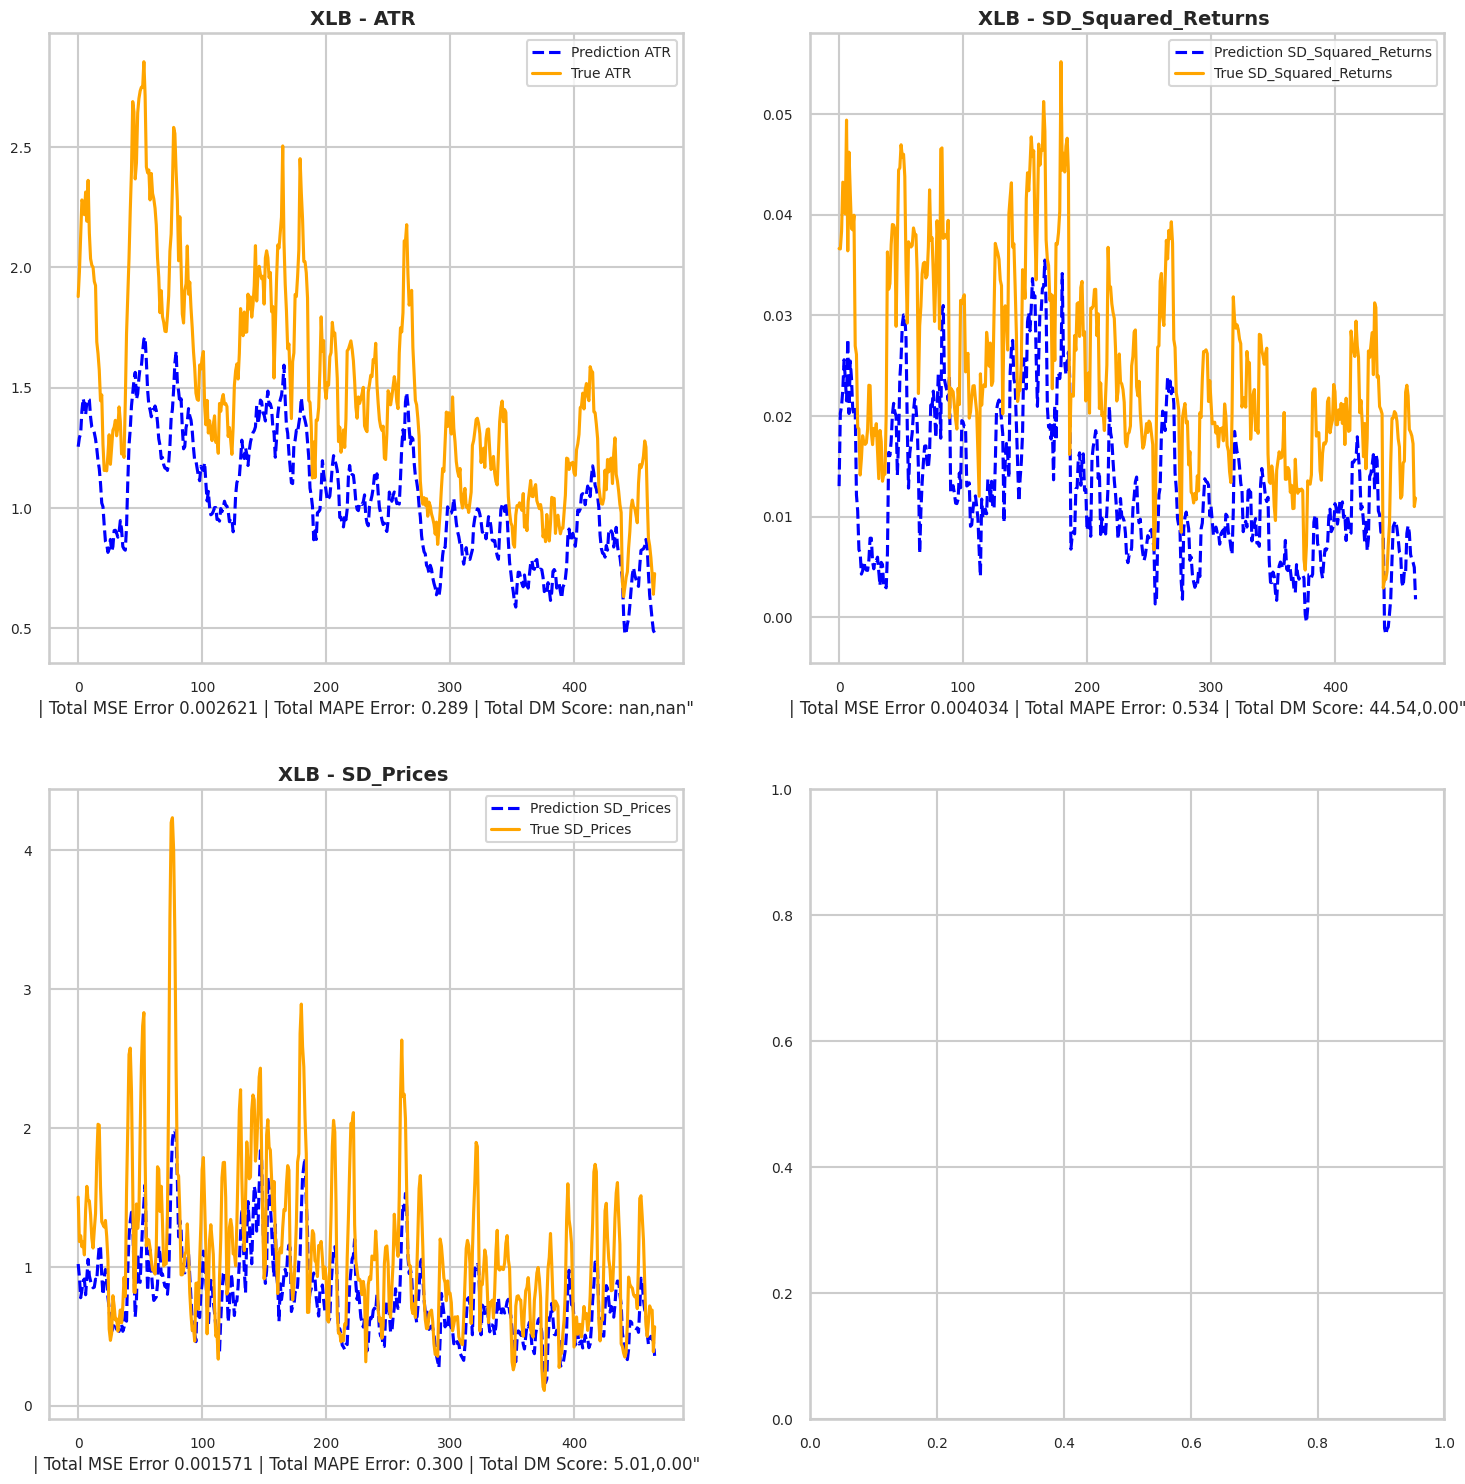

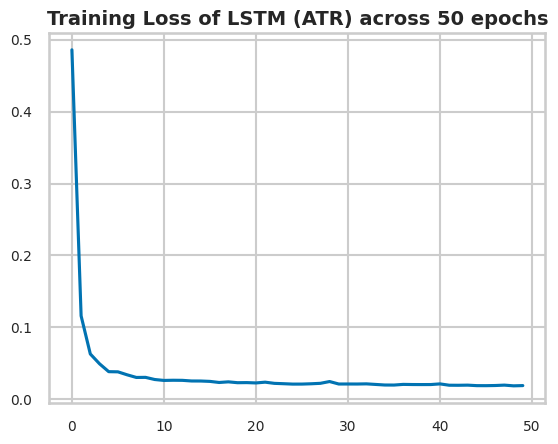

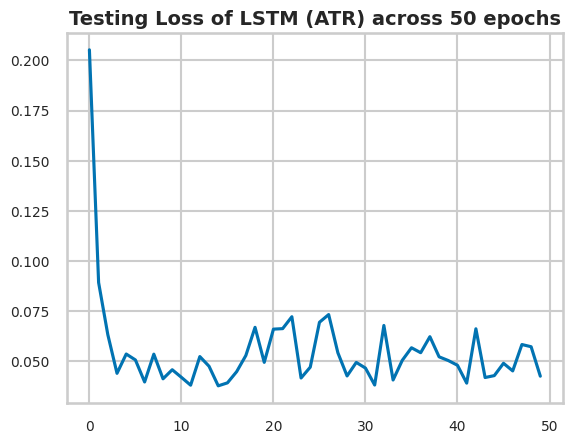

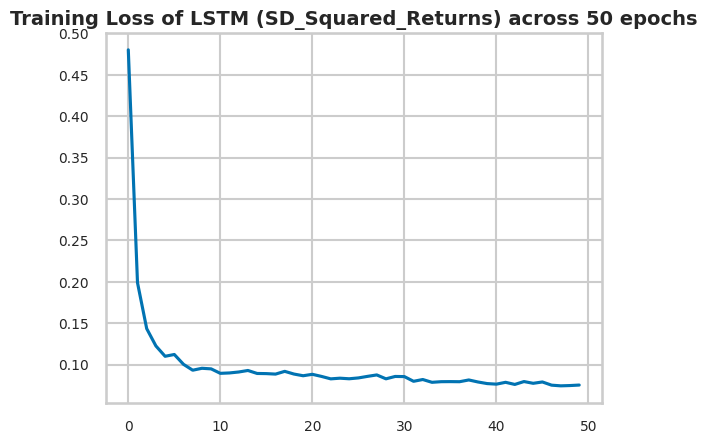

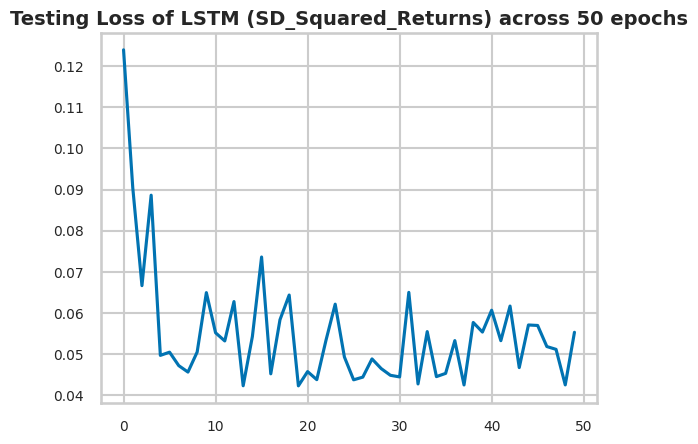

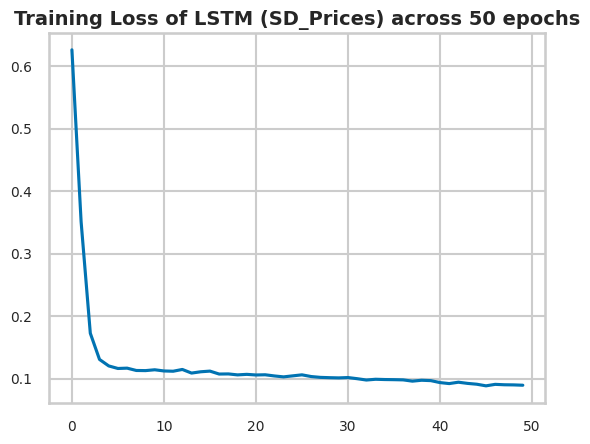

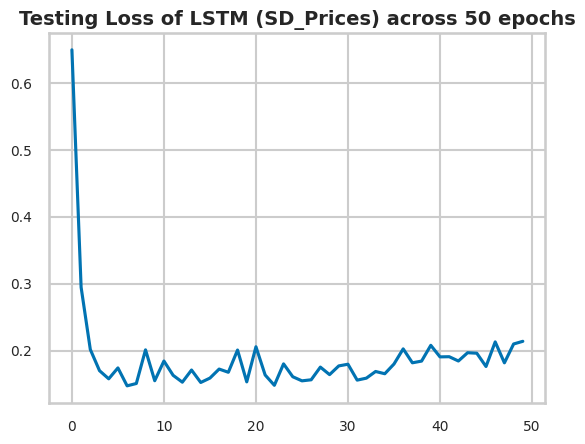

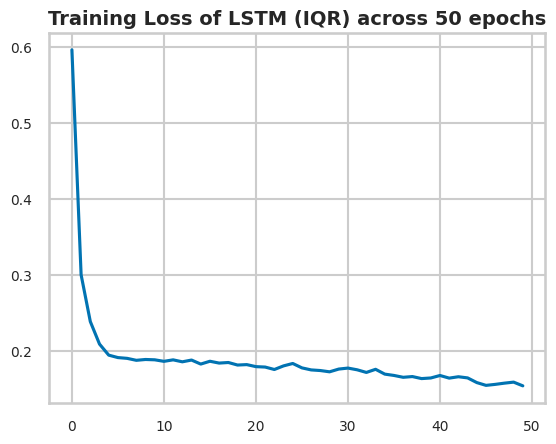

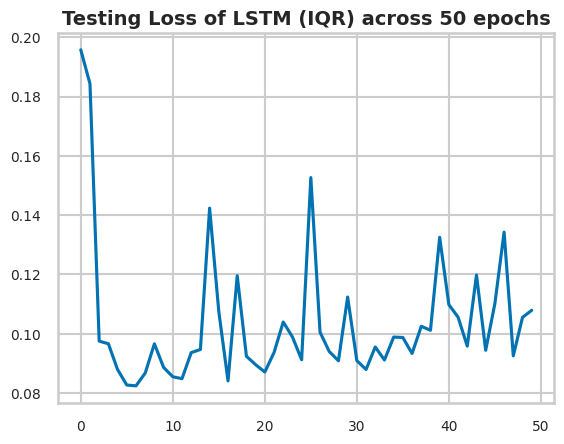

In [6]:
num=10000
for file in os.listdir('../output'):
    if "runtest" in file:
        num+=1
os.mkdir(f'../output/runtest_{num}')
for d,(start,end,start_t,end_t) in enumerate(date_list):
    os.mkdir(f'../output/runtest_{num}/date_config{d}')
    for model_type in models:
        os.mkdir(f'../output/runtest_{num}/date_config{d}/{model_type}')
        root = f'../output/runtest_{num}/date_config{d}/{model_type}'
        with open(os.path.join(root,'run_data.txt'),'w') as f:
            f.write(f'Start Training Date: {start} \n End Training Date: {end} \n Start Sim Date: {start_t} \n End Sim Date: {end_t} \n')
            f.write(f'\n Model Type: {model_type}')
            f.write(f'Look-back window: {T} days')

        for etf in etfs:
            os.mkdir(f'{root}/{etf}')
        for lr in lrs:
            results = pd.DataFrame({"ETF":[],"Metric":[],"Final_Value":[],"Passive_Potential":[],"Relative_MSE":[],"MAPE":[],"DM_stat":[],"DM_p":[]})
            money_df_std = pd.DataFrame()
            money_df_atr = pd.DataFrame()
            money_df_sd_prices = pd.DataFrame()
            money_df_iqr = pd.DataFrame()
            money_df_passive = pd.DataFrame()
            for j,etf in enumerate(etfs):
                #fig,ax = plt.subplots(1,len(metrics),figsize=(26,6))
                fig,ax = plt.subplots(2,2,figsize=(18,18))
                atr_preds = []
                for i,metric in enumerate(metrics):
                    scaler = StandardScaler()
                    scaler_x = StandardScaler()
                    df = get_cleaned_df(etf,start,end)
                    #print(df)
                    model,fig_tr,fig_te = get_trained_model(df,scaler, scaler_x, metric=metric,model_type=model_type)
                    fig_tr.savefig(os.path.join(root,etf,f'training_results_{metric}'))
                    fig_te.savefig(os.path.join(root,etf,f'testing_results_{metric}'))
                    df_test = get_cleaned_df(etf,start_t,end_t)
                    ini_cash = 10000
                    final_value, money, shares,passive_value,buy_points,sell_points,preds, t_money,p_money = backtest_strategy_mr(df_test,model,scaler,scaler_x,metric,sell_scale=1.7,buy_scale=1.7)
                    print(f"{etf} Final Value: {final_value}, Final Money: {money}, Final Shares: {shares}")
                    
                    real_met = np.array(df_test[metric].iloc[T:len(df_test)-1])
                    atr_met = np.array(df_test["ATR"].iloc[T:len(df_test)-1])
                    null_model_error = np.sum((real_met-real_met.mean())**2)
                    mse_error = 1/len(real_met) * np.sum((real_met-preds)**2)/null_model_error
                    mape_error = 1/len(real_met) * np.sum(abs(real_met-preds)/(real_met+1e-8))
                    if metric=="ATR": #atr should go first
                        money_df_atr[etf] = t_money
                        atr_preds = preds
                    elif metric=="SD_Squared_Returns":
                        money_df_std[etf] = t_money
                        money_df_passive[f"{etf}_Passive"] = p_money
                    elif metric == "SD_Prices":
                        money_df_sd_prices[etf] = t_money
                    elif metric == "IQR":
                        model_df_iqr[etf] = t_money

                    dm,p = diebold_mariano_test(atr_met,atr_preds,real_met,preds,loss="mae")
                    results.loc[len(results)] = [etf,metric,final_value,passive_value,mse_error,mape_error,dm,p]

                    sns.lineplot(preds,ax=ax[i//2][i%2],label=f"Prediction {metric}",color="Blue",linestyle = '--')
                    sns.lineplot(real_met,ax=ax[i//2][i%2],label = f"True {metric}",color="Orange")
                    #for buy in buy_points:
                        #ax[i].axvline(buy,color="Green",alpha=.6)
                    #for sell in sell_points:
                        #ax[i].axvline(sell,color="Red",alpha=.6)
                    ax[i//2][i%2].set_title(f"{etf} - {metric} ")
                    ax[i//2][i%2].set_xlabel(f'| Total MSE Error {mse_error:.6f} | Total MAPE Error: {mape_error:.3f} | Total DM Score: {dm:.2f},{p:.2f}"')
                    customize_ax(ax[i//2][i%2])
                    #plt.title(f"Performance of LSTM on {etf}")
                fig.supylabel("Volatility Metric")
                fig.supxlabel(f"Days after {start_t}")
                fig.tight_layout()
                fig.savefig(os.path.join(root,etf,'predictions_lr_{lr}.png'))
                fig_sim,ax_sim = plt.subplots(figsize=(10,3))
                sns.lineplot(x=range(0, len(df_test.index)-(T+1)), y=money_df_atr[etf], label="ATR",ax=ax_sim)
                sns.lineplot(x=range(0,len(df_test.index)-(T+1)),y=money_df_std[etf],label="SD_Squared_Returns",ax=ax_sim)
                sns.lineplot(x=range(0,len(df_test.index)-(T+1)),y=money_df_sd_prices[etf],label="SD_Prices",ax=ax_sim)
                sns.lineplot(x=range(0,len(df_test.index)-(T+1)),y=money_df_passive[f"{etf}_Passive"],label="Passive",ax=ax_sim)
                sns.lineplot(x=range(0,len(df_test.index)-(T+1)),y=money_df_iqr[etf],label="IQR",ax=ax_sim)
                ax_sim.axhline(1000, label = "Initial",color="Black")
                ax_sim.set_xlabel(f"Days after {start_t}")
                ax_sim.set_title(f"ETF Performance Over Time for {etf}")
                customize_ax(ax_sim)
                fig_sim.savefig(os.path.join(root,etf,'simulation_perf_lr_{lr}'))
                
            fig2,ax2 = plt.subplots(figsize = (8,6))
            sns.barplot(data=results,x="ETF",y="Final_Value",hue="Metric",ax=ax2)    
            plt.legend(loc=(1.1,1))
            fig2.tight_layout()
            customize_ax(ax2)
            fig2.savefig(os.path.join(root,'return_metrics_lr_{lr}.png'))
            results.to_csv(os.path.join(root,'overall_results.csv'),index=False)

In [1]:
os.listdir()

NameError: name 'os' is not defined

In [2]:
for i in range(32,41):
    df = pd.read_csv(f'runtest_{i}/overall_results.csv')
    print(i,df.groupby('Metric')['Relative_MSE'].mean())

NameError: name 'pd' is not defined

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


read  2775  lines of data for ticker:  XLP
read  251  lines of data for ticker:  XLP
On the 30th day, Bought 6.993006993006993 shares for $500.0
On the 46th day, Bought 6.968641114982578 shares for $499.99999999999994
On the 52th day, Bought 0 shares for $0.0
On the 53th day, Bought 0 shares for $0.0
On the 54th day, Bought 0 shares for $0.0
On the 55th day, Bought 0 shares for $0.0
On the 56th day, Bought 0 shares for $0.0
On the 57th day, Bought 0 shares for $0.0
On the 58th day, Bought 0 shares for $0.0
On the 59th day, Bought 0 shares for $0.0
On the 60th day, Bought 0 shares for $0.0
On the 61th day, Bought 0 shares for $0.0
On the 62th day, Bought 0 shares for $0.0
On the 63th day, Bought 0 shares for $0.0
On the 64th day, Bought 0 shares for $0.0
On the 65th day, Bought 0 shares for $0.0
On the 66th day, Bought 0 shares for $0.0
On the 67th day, Bought 0 shares for $0.0
On the 68th day, Bought 0 shares for $0.0
On the 69th day, Bought 0 shares for $0.0
On the 70th day, Bought 0 

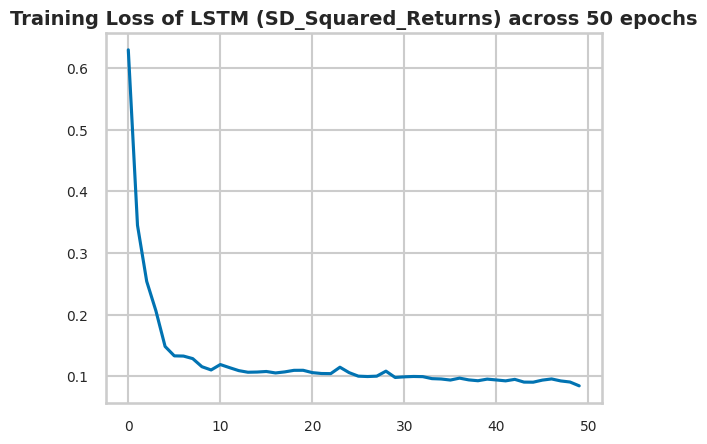

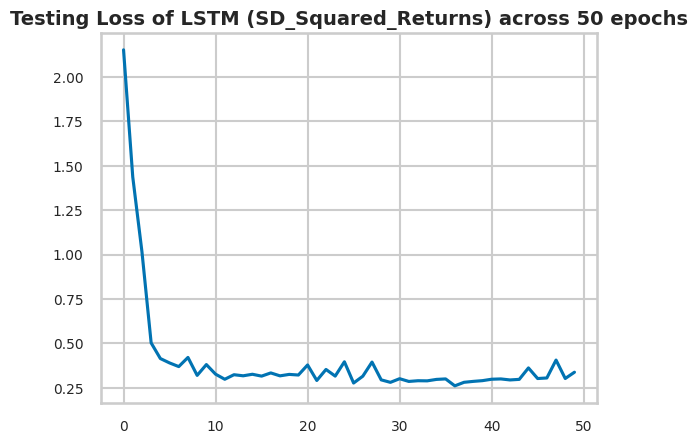

In [6]:
scaler_x = StandardScaler()
scaler = StandardScaler()
start,end,start_t,end_t = date_list[1]
df_xlp = get_cleaned_df('XLP',start,end)
df_xlp_test = get_cleaned_df('XLP',start_t,end_t)
model,fig_tr,fig_te = get_trained_model(df_xlp,scaler, scaler_x, metric="SD_Squared_Returns",model_type="LSTM")
final_value, money, shares,passive_value,buy_points,sell_points,preds, t_money,p_money = backtest_strategy_mr(df_xlp_test,model,scaler,scaler_x,"SD_Squared_Returns",sell_scale=1.7,buy_scale=1.7)

<Axes: >

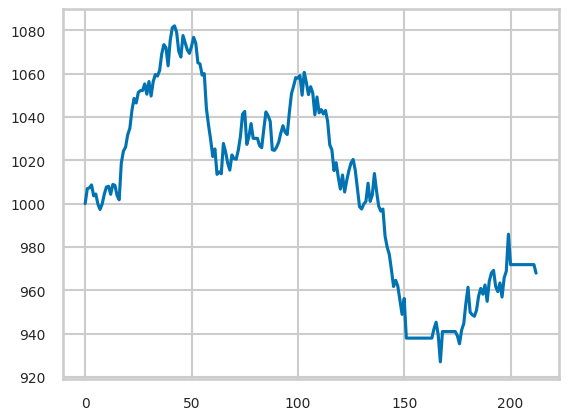

In [7]:
sns.lineplot(t_money)